In [5]:
!cat aclImdb/train/pos/10001_10.txt

Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently "I'm a lawyer" he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic here too as a mad millionaire who wants to crush the ghetto. His character is more malevolent than usual. The hospital scene, and the scene where the homeless invade a demolition site, are all-time classics. Look for the legs scene and the two big diggers fighting (one bleeds). This movie gets better each time I see it (which is quite often).

In [204]:
# use a subset of the data, load it and give an overview
vocabulary_size = 50000

# y=0: negative rating, y=1: positive rating
(X_train_raw, y_train), (X_test_raw, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train_raw), len(X_test_raw)))

# get word data
word2id = imdb.get_word_index()

Loaded dataset with 25000 training samples, 25000 test samples


In [205]:
X_test_raw

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 21686, 4

In [206]:
# sample of raw training data
idx = 0
review_len = 10
print(f'IMDB review tokens: {X_train_raw[idx][:review_len]}..., label: {y_train[idx]}')

# sample of underlying data
id2word = {i: word for word, i in word2id.items()}
review = [id2word.get(i, ' ') for i in X_train_raw[idx][:review_len]]
print(f'IMDB review       : {review}..., label: {y_train[idx]}')

IMDB review tokens: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]..., label: 1
IMDB review       : ['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their']..., label: 1


In [207]:
# lets check the size of reviews
print(f'Maximum review length: {len(max((X_train_raw + X_test_raw), key=len))}')
print(f'Minimum review length: {len(min((X_train_raw + X_test_raw), key=len))}')

Maximum review length: 2697
Minimum review length: 70


In [208]:
from keras.utils import pad_sequences

max_words = 200
X_train = pad_sequences(X_train_raw, maxlen=max_words)
X_test = pad_sequences(X_test_raw, maxlen=max_words)
print(f'Maximum review length: {len(max((X_train + X_test), key=len))}')
print(f'Minimum review length: {len(min((X_train + X_test), key=len))}')

Maximum review length: 200
Minimum review length: 200


In [209]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN,Dense,Activation

# simple RNN
model = Sequential()

model.add(Embedding(vocabulary_size,32,input_length =len(X_train[0])))
model.add(SimpleRNN(16,input_shape = (vocabulary_size,max_words), return_sequences=False,activation="relu"))
model.add(Dense(1)) #flatten
model.add(Activation("sigmoid")) # using sigmoid for binary classification

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           1600000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1600801 (6.11 MB)
Trainable params: 1600801 (6.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [210]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

batch_size = 500
num_epochs = 5
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
49/49 [==============================] - 2s 38ms/step - loss: 0.6746 - accuracy: 0.5515 - val_loss: 0.5632 - val_accuracy: 0.6180
Epoch 2/5
49/49 [==============================] - 2s 36ms/step - loss: 0.5116 - accuracy: 0.7759 - val_loss: 0.4746 - val_accuracy: 0.7920
Epoch 3/5
49/49 [==============================] - 2s 36ms/step - loss: 0.4117 - accuracy: 0.8896 - val_loss: 0.4565 - val_accuracy: 0.8320
Epoch 4/5
49/49 [==============================] - 2s 35ms/step - loss: 0.3585 - accuracy: 0.9339 - val_loss: 0.4517 - val_accuracy: 0.8380
Epoch 5/5
49/49 [==============================] - 2s 36ms/step - loss: 0.3241 - accuracy: 0.9544 - val_loss: 0.4813 - val_accuracy: 0.8400


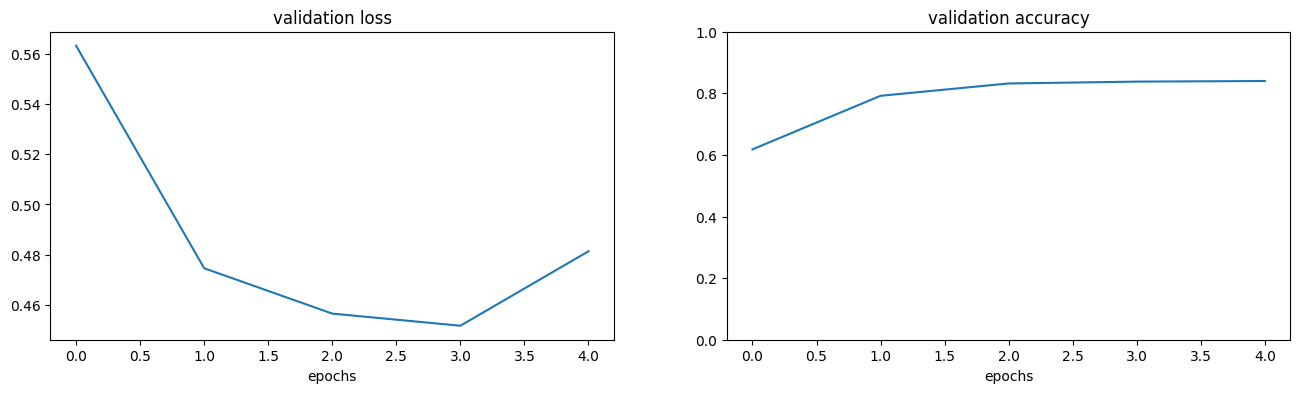

In [211]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [212]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8061599731445312


In [213]:
model.save("sentiment.keras")


In [223]:
import keras 
from keras.utils import pad_sequences


# preprocess stuff
NUM_WORDS=50000 # only use top 50000 words
INDEX_FROM=3   # word index offset
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
id_to_word = {value:key for key,value in word_to_id.items()}

loaded_model = keras.saving.load_model("sentiment.keras")



sentence = "kjsdhf sdflkh"

sentence_input = "<START> " + sentence.lower()
sentence_tokens = [word_to_id.get(i, word_to_id.get("<UNK>")) for i in sentence_input.split(" ")]
sentence_tokens

if None in sentence_tokens:
    print("ERROR")

inference_data = pad_sequences([sentence_tokens], maxlen=max_words)

res = loaded_model.predict(inference_data)

if res:
    if res[0][0] > 0.5:
        print("positive") 
    else:
        print("negative")

1/1 [==============================] - 0s 80ms/step
positive


['<START>', 'Awesome', 'movie!']